In [6]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
import seaborn as sns
import sys
import scipy.stats as sc
import pandas as pd
import ffl

sys.path.append('../External_Functions')
from ExternalFunctions import UnbinnedLH, Chi2Regression, BinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax  # Useful functions to print fit results on figure

sns.set()
sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")

colors = sns.color_palette('deep', 10, desat = 1)
sns.set_palette(colors)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 2
plt.rcParams['figure.figsize'] = (16, 9)


# 1.2 - A store has 52.8 customers/day, and considers the top 20% busiest days to be. . . busy!

## 1.2.1 - What distribution should the number of daily customers follow and why?

When dealing with rates of discrete events happening in a continuum, we should always think of the Poisson distribution. Barlow example with thunderstorms explains is prettey well: we can ask what is the rate of ligning strikes, but it is meaningless to ask, how often it doesnt occur (as opposed to the binomial distribution).

The Poisson distribution is written:

$$ P_{Poisson} = \frac{e^{-\lambda} \lambda ^r}{r!} $$

where r is and the number of events (customers per day) and lambda is the expected number of events (i.e. the rate)


## 1.2.2 Discuss what number of customers exactly constitutes a busy day

If we use the above equation and find the distribution for a range of $r$, we can then integrate it in some range $r =[r, \infty]$ 
to get 20% of the area under the distribution. This means, that a day with the amount of customers in that integration range is considered a busy day.

The specific number of customers can be found by using the Poiosson CDF in $P(r) = 80\%$ to find $r$.

This r is found to be $r = 59$ 

Text(0, 0.5, 'Probability')

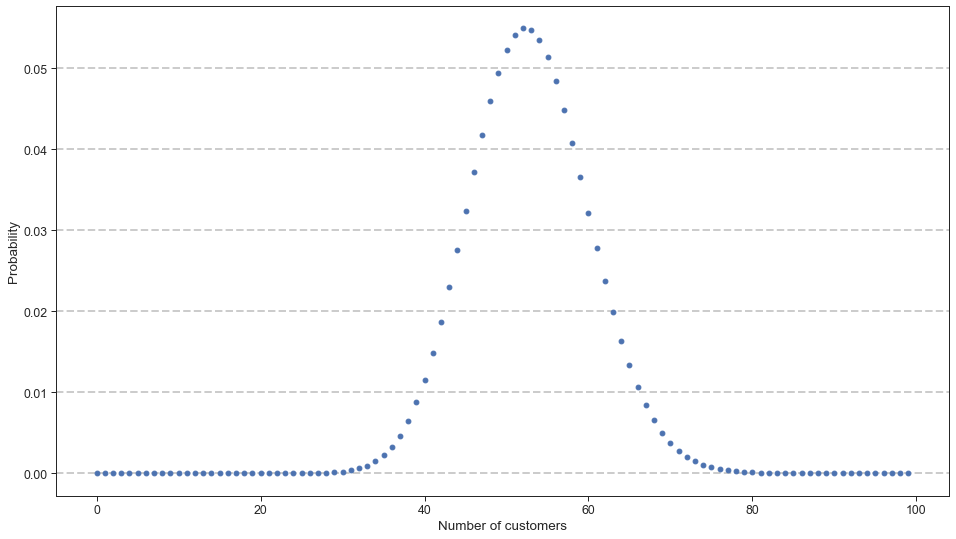

In [20]:
lambda_rate = 52.8
r = np.arange(0, 100, 1)

def poisson(r, lamb):
    return (lamb**r)*np.exp(-lamb)/np.math.factorial(r)

P_poisson = []
for i in range(len(r)):
    P_poisson.append(poisson(r[i], lambda_rate))

fig, ax = plt.subplots()
ax.plot(r, P_poisson, 'o', label = 'Poisson distribution')
ax.set_xlabel('Number of customers')
ax.set_ylabel('Probability')

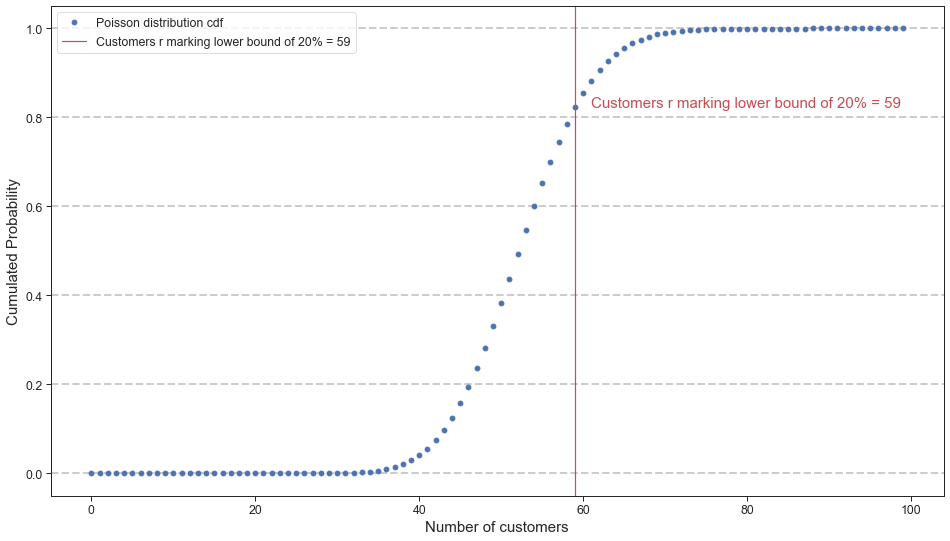

In [21]:
#Plot sicpy.poisson.cdf

P_poisson_cdf = []
for i in range(len(r)):
    P_poisson_cdf.append(sc.poisson.cdf(r[i], lambda_rate))

x_i = np.where(np.array(P_poisson_cdf) >= .8)[0][0]


fig, ax = plt.subplots()
ax.plot(r, P_poisson_cdf, 'o', label = 'Poisson distribution cdf')
ax.axvline(r[x_i], color = 'r', label = f'Customers r marking lower bound of 20% = {r[x_i]}'.format(x_i))
# add text with cusomer number r[x_i]
ax.text(r[x_i] +2 , P_poisson_cdf[x_i], f'Customers r marking lower bound of 20% = {r[x_i]}'.format(x_i), fontsize = 15, color = 'r')
ax.set_xlabel('Number of customers', fontsize = 15)
ax.set_ylabel('Cumulated Probability', fontsize = 15)
ax.legend()

plt.savefig('saved_images/1_2_2')

## 1.2.3

For this question i decided to use simulation: I decided to draw 10000 random numbers from the Poisson distribution and then take the average of the top 20% (i.e. the 2000 biggest numbers)

As written in the plot, the average number of customers on the 20% bussiest days is $63.07 \pm 0.08$ cumstomers

In [22]:
N_picks = 10000
rand_pois = np.random.poisson(lambda_rate, N_picks)

rand_pois = np.sort(rand_pois)
rand_pois_20 = rand_pois[8000:]

mean_20 = np.mean(rand_pois_20)
std_20 = np.std(rand_pois_20)
SEM_20 = std_20/np.sqrt(len(rand_pois_20))
err_std_20 = std_20/np.sqrt(2*(len(rand_pois_20)-1))

dict_20 = {'Mean of top 20%': [mean_20, SEM_20], 'Standard deviation of top 20%': [std_20,  err_std_20]}

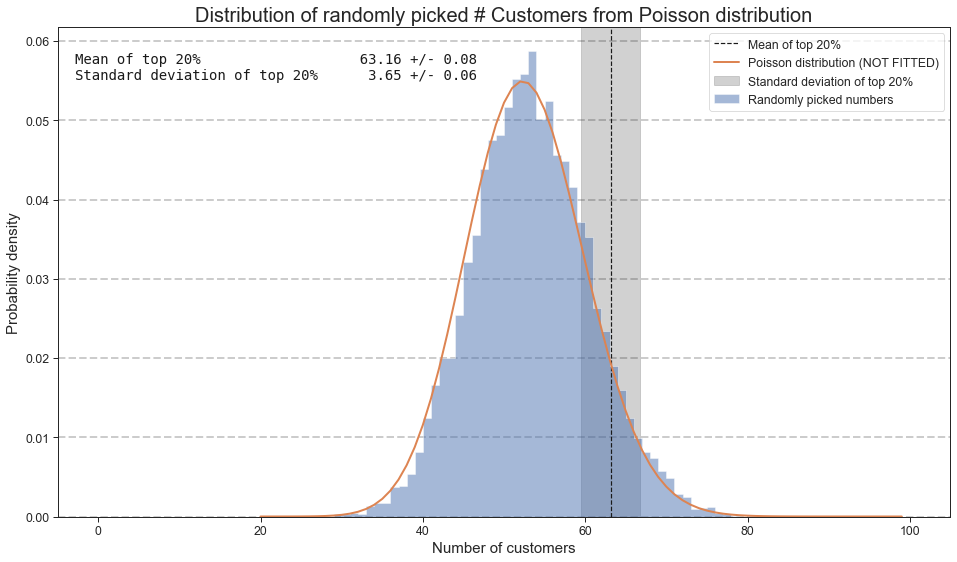

In [24]:


# Showing that they follow the distribution
fig, ax = plt.subplots()
hist_range = [0, 100]
N_bins = 100

nice_string = nice_string_output(dict_20, decimals=2)
add_text_to_ax(0.02, 0.95, nice_string, ax, fontsize=14)

ax.axvline(mean_20, ls='--', color = 'k', label = 'Mean of top 20%')
# Fill between the mean and mean+std
ax.axvspan(mean_20-std_20, mean_20+std_20, alpha=0.2, color='k', label = 'Standard deviation of top 20%')

ax.hist(rand_pois, bins = N_bins, range=hist_range, density = True, label = 'Randomly picked numbers', histtype='stepfilled', alpha = 0.5);
r = np.arange(20, 100, 1)
y_poisson = sc.poisson.pmf(r, lambda_rate)
ax.plot(r, y_poisson, label = 'Poisson distribution (NOT FITTED)', linewidth = 2)
ax.set_xlabel('Number of customers', fontsize=15)
ax.set_ylabel('Probability density', fontsize=15)
ax.set_title('Distribution of randomly picked # Customers from Poisson distribution', fontsize=20)
ax.legend()


plt.savefig('saved_images/1_2_3')